#  A Waiter's Tips Prediction

Giving a waiter or waitress a tip does a lot for them. You are signaling to them that you appreciate them and want to give something back. Their hard work makes your experience at the restaurant more enjoyable. Many times the people serving you get paid a base, or tipped, wage, so they depend on getting a tip. We always do our best to be nice to the people helping us. It makes our day and their day a little bit better by showing respect and appreciation for them.

The model is trying to predict a watier's tip according to some features. The dataset is from the Kaggle website and includes 244 samples and 7 features. 

## <u>  Colmuns: <u>
* **total_bill** - How much the meal cost in dollars.

* **tip** - A waiter's tip (the feature we will predict).

* **sex** - Waiter's sex (male or female).

* **smoker** - If diners are smokers. 

* **day** - Day in the week.

* **time** - Dinner or Lunch.

* **size** - How many diners.

### <u> Part 1 : Familiarity with the dataset

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

##### Loading the dataset

In [177]:
tips =pd.read_csv(r'C:\Users\97253\Waiter-Tips\Waiter-Tips\\tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


##### Some Samples

In [18]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
37,16.93,3.07,Female,No,Sat,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3
70,12.02,1.97,Male,No,Sat,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
122,14.26,2.50,Male,No,Thur,Lunch,2


##### Features categories

In [19]:
tips.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


##### Statics information of the dataset

In [20]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [178]:
t_dummies = pd.get_dummies(tips,columns=['day'], dummy_na=False)

#1 for women and 0 for ma men
t_dummies['sex'] = np.where(t_dummies['sex']=='Female', 1, 0)
#1 for dinner and 0 for Lunch
t_dummies['time'] = np.where(t_dummies['time']=='Dinner	',1, 0)
#1 for smoker and 0 for not
t_dummies['smoker'] = np.where(t_dummies['smoker']=='Yes',1, 0)

In [182]:
tips = t_dummies

In [94]:
tips.tip.mean()

2.9982786885245902

Text(0.5, 1.0, 'female and male count')

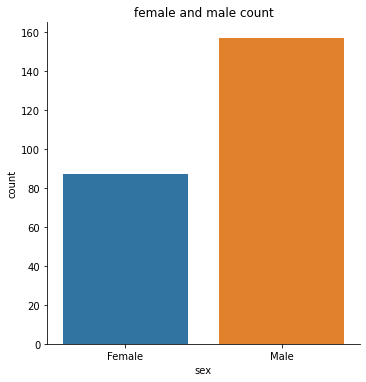

In [95]:
sns.catplot(x="sex",data=tips,kind="count")
plt.title('female and male count')

NameError: name 'ax1' is not defined

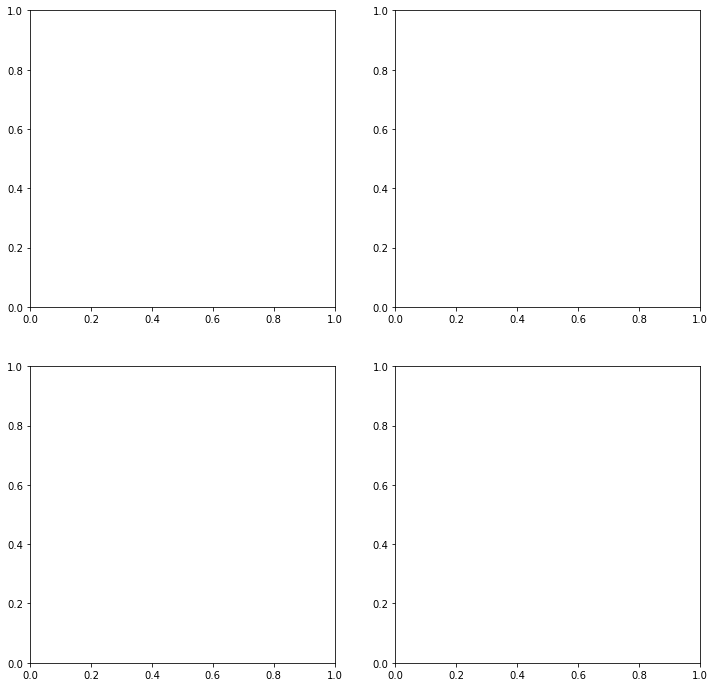

In [180]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) 


ax1=tips["day"].value_counts().plot(kind = "pie", autopct = "%.2f" )
ax1.set_title("days division", fontdict={'fontsize': 10})


ax2=tips["sex"].value_counts().plot(kind = "pie", autopct = "%.2f" )
ax2.set_title("sex division", fontdict={'fontsize': 10})


ax3=tips["smoker"].value_counts().plot(kind = "pie", autopct = "%.2f" )
ax3.set_title("Smokers division", fontdict={'fontsize': 10})


ax4=tips["time"].value_counts().plot(kind = "pie", autopct = "%.2f" )
ax4.set_title("Time division", fontdict={'fontsize': 10})

plt.tight_layout()
plt.show()

In [97]:
tips.groupby('sex').tip.mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

In [98]:
tips.sort_values('tip').tail(3)

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3


In [99]:
tips.value_counts('day')

day
Sat     87
Sun     76
Thur    62
Fri     19
dtype: int64

In [100]:
tips.groupby('day').tip.mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

Text(0.5, 1.0, 'Relationship between total bill and tip')

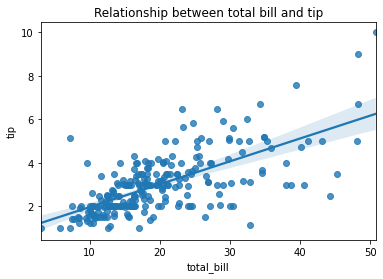

In [101]:
sns.regplot(x =tips['total_bill'], y=tips['tip'])
plt.title('Relationship between total bill and tip')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

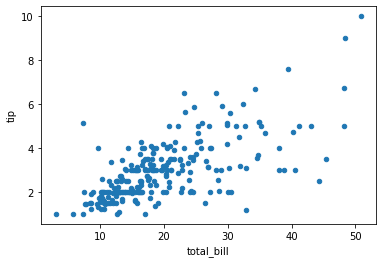

In [102]:
tips.plot(x ='total_bill', y='tip', kind ='scatter')


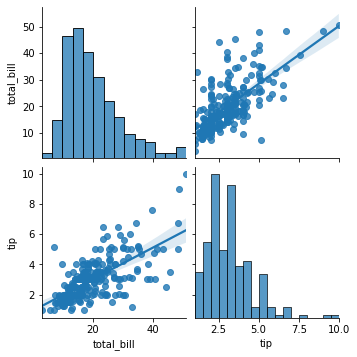

In [103]:
sns.pairplot(tips[['total_bill','tip']], kind='reg') 


In [104]:
df_smoke_size=pd.DataFrame(tips.groupby(['smoker','size']).tip.mean())
df_smoke_size


tip
smoker size          
No     1     1.415000
       2     2.489000
       3     3.069231
       4     4.195769
       5     5.046667
       6     5.225000
Yes    1     1.460000
       2     2.709545
       3     4.095000
       4     3.992727
       5     2.500000

Text(0.5, 1.0, 'Data separate by days')

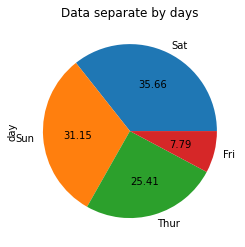

In [105]:
tips["day"].value_counts().plot(kind = "pie", autopct = "%.2f" )

plt.title('Data separate by days')

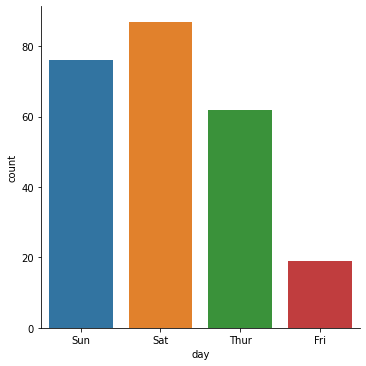

In [106]:
sns.catplot(x="day",data=tips,kind="count")

In [107]:
df_smoke_sex=pd.DataFrame(tips.groupby(['smoker','sex']).tip.mean())
df_smoke_sex

tip
smoker sex             
No     Female  2.773519
       Male    3.113402
Yes    Female  2.931515
       Male    3.051167

In [108]:
tips.groupby(['time','size']).tip.mean()

time    size
Dinner  1       1.000000
        2       2.661923
        3       3.490000
        4       4.122500
        5       3.785000
        6       5.000000
Lunch   1       1.875000
        2       2.423077
        3       2.754000
        4       4.218000
        5       5.000000
        6       5.300000
Name: tip, dtype: float64

In [109]:
tips.groupby(['time','sex']).count()

total_bill  tip  smoker  day  size
time   sex                                       
Dinner Female          52   52      52   52    52
       Male           124  124     124  124   124
Lunch  Female          35   35      35   35    35
       Male            33   33      33   33    33

In [110]:
tips.groupby(['day','size']).count()

total_bill  tip  sex  smoker  time
day  size                                    
Fri  1              1    1    1       1     1
     2             16   16   16      16    16
     3              1    1    1       1     1
     4              1    1    1       1     1
Sat  1              2    2    2       2     2
     2             53   53   53      53    53
     3             18   18   18      18    18
     4             13   13   13      13    13
     5              1    1    1       1     1
Sun  2             39   39   39      39    39
     3             15   15   15      15    15
     4             18   18   18      18    18
     5              3    3    3       3     3
     6              1    1    1       1     1
Thur 1              1    1    1       1     1
     2             48   48   48      48    48
     3              4    4    4       4     4
     4              5    5    5       5     5
     5              1    1    1       1     1
     6              3    3    3       3     3

In [111]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [112]:
t_dummies

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,1,0,0,2,0,0,1,0
1,10.34,1.66,0,0,0,3,0,0,1,0
2,21.01,3.50,0,0,0,3,0,0,1,0
3,23.68,3.31,0,0,0,2,0,0,1,0
4,24.59,3.61,1,0,0,4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,0,3,0,1,0,0
240,27.18,2.00,1,1,0,2,0,1,0,0
241,22.67,2.00,0,1,0,2,0,1,0,0
242,17.82,1.75,0,0,0,2,0,1,0,0


# train-test-split

In [183]:
tips

,total_bill,tip,sex,smoker,time,size,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,1,0,0,2,0,0,1,0
1,10.34,1.66,0,0,0,3,0,0,1,0
2,21.01,3.50,0,0,0,3,0,0,1,0
3,23.68,3.31,0,0,0,2,0,0,1,0
4,24.59,3.61,1,0,0,4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,0,3,0,1,0,0
240,27.18,2.00,1,1,0,2,0,1,0,0
241,22.67,2.00,0,1,0,2,0,1,0,0
242,17.82,1.75,0,0,0,2,0,1,0,0


In [184]:
X = tips.drop('tip' , axis=1 , inplace=False)
y = tips['tip']

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=42)

# MinMaxScaler

In [194]:
scaler_model = MinMaxScaler()

X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

numerical_features = ['total_bill']

scaler_model.fit(X_train_normalized[numerical_features])

X_train_normalized['total_bill'] = scaler_model.transform(X_train_normalized[numerical_features])
X_test_normalized['total_bill'] = scaler_model.transform(X_test_normalized[numerical_features])

In [195]:
tips_train = pd.DataFrame(data = X_train_normalized)
tips_test = pd.DataFrame(data = X_test_normalized)

In [207]:
tips_test.shape

(49, 9)

In [197]:
tips_train

,total_bill,sex,smoker,time,size,day_Fri,day_Sat,day_Sun,day_Thur
228,0.167111,0,0,0,2,0,1,0,0
208,0.411008,0,1,0,2,0,1,0,0
96,0.477807,0,1,0,2,1,0,0,0
167,0.576121,0,0,0,4,0,0,1,0
84,0.227031,0,0,0,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...
106,0.327119,0,1,0,2,0,1,0,0
14,0.201509,1,0,0,2,0,0,1,0
92,0.000000,1,1,0,2,1,0,0,0
179,0.640923,0,1,0,2,0,0,1,0


In [119]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'time', 'size', 'day_Fri',
       'day_Sat', 'day_Sun', 'day_Thur'],
      dtype='object')

In [122]:
X = tips[['total_bill', 'sex', 'smoker', 'time', 'size', 'day_Fri','day_Sat', 'day_Sun', 'day_Thur']]
y = tips['tip']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
target = tips.tip
features = tips.loc[:,tips.columns!='tip']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

In [43]:
scale_columns=['total_bill','size','tip']

In [45]:
normalized = tips.DataFrame()  
for col in merged.columns:
    if col in ['Condo', 'Multi-Family', 'Residential']:
        normalized[col] = merged[col]
    else:
        normalized[col] = normalize(merged[col])

AttributeError: 'DataFrame' object has no attribute 'DataFrame'

In [259]:

tips = pd.concat([tips, scaled_columns], axis=0)
tips

,tip,total_bill,size
"(No, 1)",1.415000,NaN,NaN
"(No, 2)",2.489000,NaN,NaN
"(No, 3)",3.069231,NaN,NaN
"(No, 4)",4.195769,NaN,NaN
"(No, 5)",5.046667,NaN,NaN
...,...,...,...
993,0.020024,0.543779,0.4
994,0.004070,0.505027,0.2
995,0.004070,0.410557,0.2
996,0.003052,0.308965,0.2


In [116]:
target = tips.tip
features = tips.loc[:,tips.columns!='tip']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

In [121]:
X_train.shape


(183, 6)

In [120]:

X_test.shape

(61, 6)

In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tips["sex"]=tips.DataFrame(le.fit_transform(tips["sex"])



SyntaxError: unexpected EOF while parsing (<ipython-input-133-ee118623239a>, line 4)

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,0,0,1,0,0,1,0
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0


In [ ]:
from sklearn.linear_model import LinearRegression